### Лабораторная работа 1. Численное моделирование движения спутника

Численно решить задачу двух тел (движение спутника вокруг планеты) методами:
1) Явные методы Рунге-Кутта от 1 до 4 порядка
2) Явные методы Адамса от 2 до 4 порядка (с разгонным участком)
3) Явные методы Формулы Дифференцирования Назад от 2 до 4 порядка (с разгонным участком)

Система уравнений:
\begin{cases}
x' = z, \\
y' = u, \\
z' = -\frac{x}{(x^2 + y^2)^{3/2}}, \\
u' = -\frac{y}{(x^2 + y^2)^{3/2}}
\end{cases}

Начальные условия:
x(0)=0.5, y(0)=0, z(0)=0, u(0)=√3
Интервал: 0 ≤ t ≤ 20

Требуется построить траекторию движения и исследовать зависимость от шага интегрирования.

### Инициализация системы

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
class StateVector:
    def __init__(self, t, x, y, z, u):
        self.t = t
        self.x = x
        self.y = y
        self.z = z  # скорость по x
        self.u = u  # скорость по y

class Params:
    t_start = 0.0
    t_end = 20.0
    dt = 0.01

# Начальные условия
initial = StateVector(Params.t_start, 0.5, 0.0, 0.0, np.sqrt(3))

def derivatives(t, state):
    r_cubed = (state.x**2 + state.y**2)**(1.5)
    if r_cubed == 0:
        return np.zeros(4)
    return np.array([
        state.z,
        state.u,
        -state.x / r_cubed,
        -state.y / r_cubed
    ])

### Реализация методов Рунге-Кутты

In [41]:
def rk1(state, dt):
    k = derivatives(state.t, state)
    return StateVector(state.t + dt,
                      state.x + dt*k[0],
                      state.y + dt*k[1],
                      state.z + dt*k[2],
                      state.u + dt*k[3])

def rk2(state, dt):
    k1 = derivatives(state.t, state)
    k2 = derivatives(state.t + dt/2, StateVector(state.t, 
                    state.x + dt/2*k1[0],
                    state.y + dt/2*k1[1],
                    state.z + dt/2*k1[2],
                    state.u + dt/2*k1[3]))
    return StateVector(state.t + dt,
                      state.x + dt*k2[0],
                      state.y + dt*k2[1],
                      state.z + dt*k2[2],
                      state.u + dt*k2[3])

def rk3(state, dt):
    k1 = derivatives(state.t, state) 
    k2 = derivatives(state.t + dt/2, StateVector(state.t,
                    state.x + dt/2*k1[0],
                    state.y + dt/2*k1[1],
                    state.z + dt/2*k1[2],
                    state.u + dt/2*k1[3]))
    k3 = derivatives(state.t + dt, StateVector(state.t,
                    state.x - dt*k1[0] + 2*dt*k2[0],
                    state.y - dt*k1[1] + 2*dt*k2[1],
                    state.z - dt*k1[2] + 2*dt*k2[2],
                    state.u - dt*k1[3] + 2*dt*k2[3]))  
    return StateVector(state.t + dt,
                     state.x + dt/6*(k1[0] + 4*k2[0] + k3[0]),
                     state.y + dt/6*(k1[1] + 4*k2[1] + k3[1]),
                     state.z + dt/6*(k1[2] + 4*k2[2] + k3[2]),
                     state.u + dt/6*(k1[3] + 4*k2[3] + k3[3]))

def rk4(state, dt):
    k1 = derivatives(state.t, state)
    k2 = derivatives(state.t + dt/2, StateVector(state.t,
                    state.x + dt/2*k1[0],
                    state.y + dt/2*k1[1],
                    state.z + dt/2*k1[2],
                    state.u + dt/2*k1[3]))
    k3 = derivatives(state.t + dt/2, StateVector(state.t,
                    state.x + dt/2*k2[0],
                    state.y + dt/2*k2[1],
                    state.z + dt/2*k2[2],
                    state.u + dt/2*k2[3]))
    k4 = derivatives(state.t + dt, StateVector(state.t,
                    state.x + dt*k3[0],
                    state.y + dt*k3[1],
                    state.z + dt*k3[2],
                    state.u + dt*k3[3]))
    return StateVector(state.t + dt,
                      state.x + dt/6*(k1[0]+2*k2[0]+2*k3[0]+k4[0]),
                      state.y + dt/6*(k1[1]+2*k2[1]+2*k3[1]+k4[1]),
                      state.z + dt/6*(k1[2]+2*k2[2]+2*k3[2]+k4[2]),
                      state.u + dt/6*(k1[3]+2*k2[3]+2*k3[3]+k4[3]))

### Визуализация траектории (Рунге-Кутты)

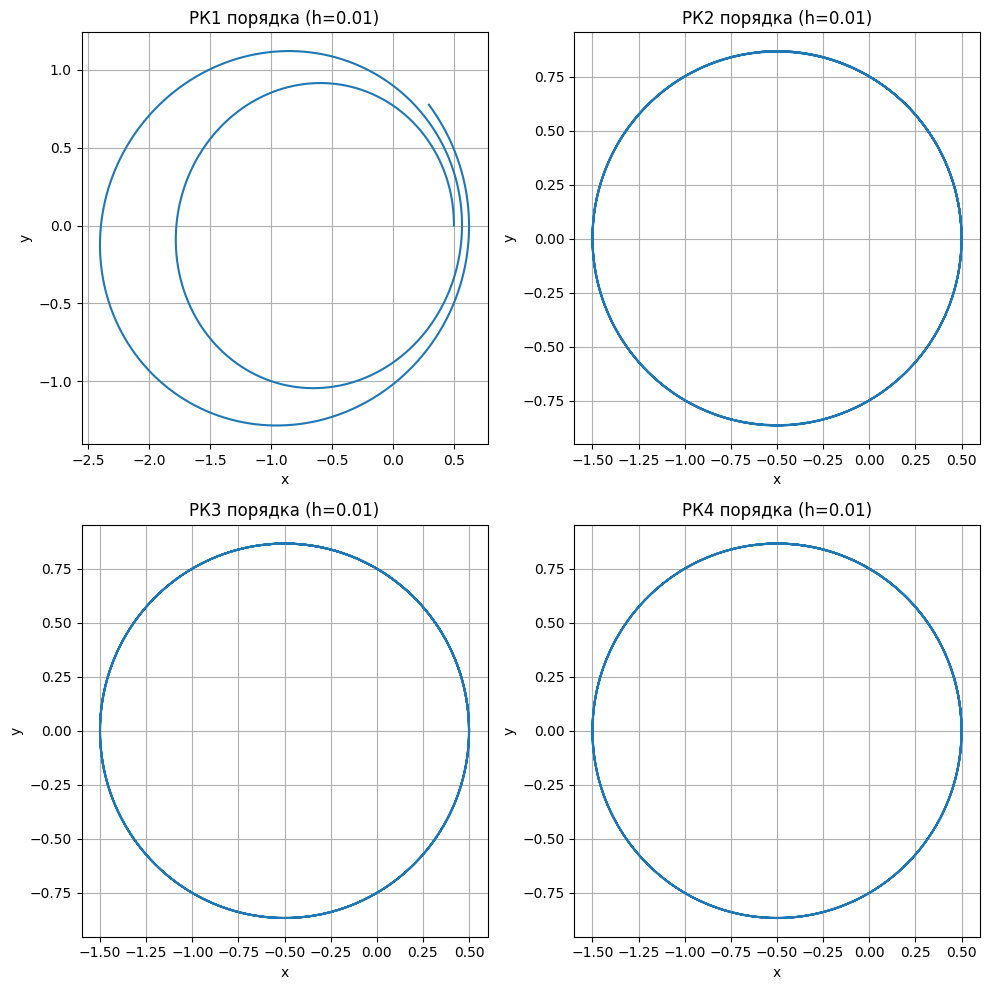

In [42]:
def simulate(method, dt):
    states = [initial]
    while states[-1].t < Params.t_end:
        states.append(method(states[-1], dt))
    return states

plt.figure(figsize=(10, 10))
    
# Метод Рунге-Кутты 1 порядка
plt.subplot(2, 2, 1)
states = simulate(rk1, 0.01)
x = [s.x for s in states]
y = [s.y for s in states]
plt.plot(x, y)
plt.title("РК1 порядка (h=0.01)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# Метод Рунге-Кутты 2 порядка
plt.subplot(2, 2, 2)
states = simulate(rk2, 0.01)
x = [s.x for s in states]
y = [s.y for s in states]
plt.plot(x, y)
plt.title("РК2 порядка (h=0.01)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# Метод Рунге-Кутты 3 порядка
plt.subplot(2, 2, 3)
states = simulate(rk3, 0.01)
x = [s.x for s in states]
y = [s.y for s in states]
plt.plot(x, y)
plt.title("РК3 порядка (h=0.01)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# Метод Рунге-Кутты 4 порядка
plt.subplot(2, 2, 4)
states = simulate(rk4, 0.01)
x = [s.x for s in states]
y = [s.y for s in states]
plt.plot(x, y)
plt.title("РК4 порядка (h=0.01)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.tight_layout()
plt.show()

### Методы Адамса

In [43]:
def adams_bashforth_2(states, dt):
    f_prev = derivatives(states[-2].t, states[-2])
    f_curr = derivatives(states[-1].t, states[-1])
    new_x = states[-1].x + dt*(3*f_curr[0] - f_prev[0])/2
    new_y = states[-1].y + dt*(3*f_curr[1] - f_prev[1])/2
    new_z = states[-1].z + dt*(3*f_curr[2] - f_prev[2])/2
    new_u = states[-1].u + dt*(3*f_curr[3] - f_prev[3])/2
    return StateVector(states[-1].t + dt, new_x, new_y, new_z, new_u)

def adams_bashforth_3(states, dt):
    f = [derivatives(s.t, s) for s in states[-3:]]
    coeff = [23, -16, 5]
    new_x = states[-1].x + dt/12 * sum(c*f[i][0] for i, c in enumerate(coeff))
    new_y = states[-1].y + dt/12 * sum(c*f[i][1] for i, c in enumerate(coeff))
    new_z = states[-1].z + dt/12 * sum(c*f[i][2] for i, c in enumerate(coeff))
    new_u = states[-1].u + dt/12 * sum(c*f[i][3] for i, c in enumerate(coeff))
    return StateVector(states[-1].t + dt, new_x, new_y, new_z, new_u)

def adams_bashforth_4(states, dt):
    f = [derivatives(s.t, s) for s in states[-4:]]
    coeff = [55, -59, 37, -9]
    new_x = states[-1].x + dt/24 * sum(c*f[i][0] for i, c in enumerate(coeff))
    new_y = states[-1].y + dt/24 * sum(c*f[i][1] for i, c in enumerate(coeff))
    new_z = states[-1].z + dt/24 * sum(c*f[i][2] for i, c in enumerate(coeff))
    new_u = states[-1].u + dt/24 * sum(c*f[i][3] for i, c in enumerate(coeff))
    return StateVector(states[-1].t + dt, new_x, new_y, new_z, new_u)

### Визуализация (Адамс)

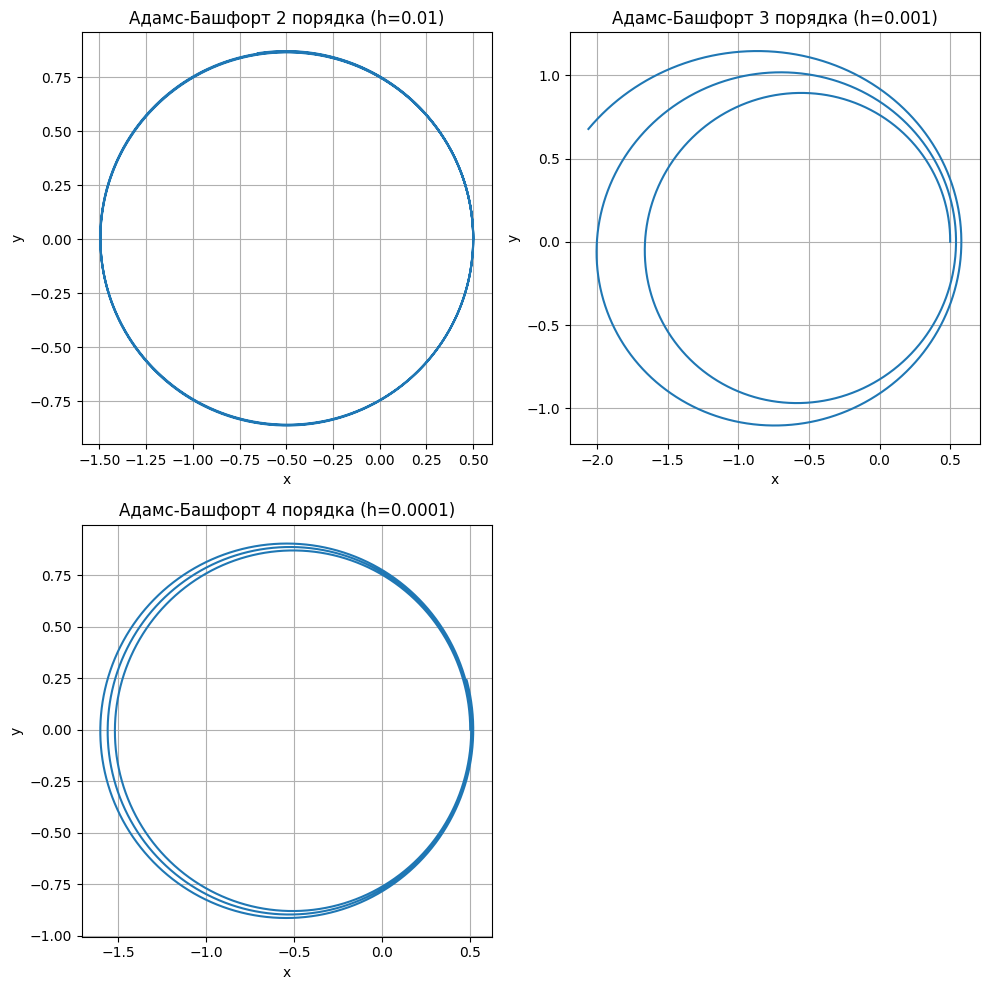

In [44]:
def simulate_adams(method, dt, order):
    # Разгонный участок РК4
    states = simulate(rk4, dt)[:order]
    while states[-1].t < Params.t_end:
        states.append(method(states, dt))
    return states

plt.figure(figsize=(10, 10))

# Метод Адамса-Башфорта 2 порядка
plt.subplot(2, 2, 1)
states = simulate_adams(adams_bashforth_2, 0.01, 2)
x = [s.x for s in states]
y = [s.y for s in states]
plt.plot(x, y)
plt.title("Адамс-Башфорт 2 порядка (h=0.01)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# Метод Адамса-Башфорта 3 порядка
plt.subplot(2, 2, 2)
states = simulate_adams(adams_bashforth_3, 0.001, 3)
x = [s.x for s in states]
y = [s.y for s in states]
plt.plot(x, y)
plt.title("Адамс-Башфорт 3 порядка (h=0.001)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# Метод Адамса-Башфорта 4 порядка
plt.subplot(2, 2, 3)
states = simulate_adams(adams_bashforth_4, 0.0001, 4)
x = [s.x for s in states]
y = [s.y for s in states]
plt.plot(x, y)
plt.title("Адамс-Башфорт 4 порядка (h=0.0001)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# Оставляем 4-й подграфик пустым для симметрии
plt.subplot(2, 2, 4)
plt.axis('off')

plt.tight_layout()
plt.show()

### Явные методы Формулы Дифференцирования Назад

In [45]:
def FDB_2(states, dt):
    f_prev = derivatives(states[-1].t, states[-1])
    return StateVector(
        states[-1].t + dt,
        (4/3)*states[-1].x - (1/3)*states[-2].x + (2/3)*dt*states[-1].z,
        (4/3)*states[-1].y - (1/3)*states[-2].y + (2/3)*dt*states[-1].u,
        (4/3)*states[-1].z - (1/3)*states[-2].z + (2/3)*dt*f_prev[2],  
        (4/3)*states[-1].u - (1/3)*states[-2].u + (2/3)*dt*f_prev[3]   
    )

def FDB_3(states, dt):
    return StateVector(
        states[-1].t + dt,
        (18/11)*states[-1].x - (9/11)*states[-2].x + (2/11)*states[-3].x + (6/11)*dt*states[-1].z,
        (18/11)*states[-1].y - (9/11)*states[-2].y + (2/11)*states[-3].y + (6/11)*dt*states[-1].u,
        (18/11)*states[-1].z - (9/11)*states[-2].z + (2/11)*states[-3].z + (6/11)*dt*derivatives(states[-1].t, states[-1])[2],
        (18/11)*states[-1].u - (9/11)*states[-2].u + (2/11)*states[-3].u + (6/11)*dt*derivatives(states[-1].t, states[-1])[3]
    )

def FDB_4(states, dt):
    return StateVector(
        states[-1].t + dt,
        (48/25)*states[-1].x - (36/25)*states[-2].x + (16/25)*states[-3].x - (3/25)*states[-4].x + (12/25)*dt*states[-1].z,
        (48/25)*states[-1].y - (36/25)*states[-2].y + (16/25)*states[-3].y - (3/25)*states[-4].y + (12/25)*dt*states[-1].u,
        (48/25)*states[-1].z - (36/25)*states[-2].z + (16/25)*states[-3].z - (3/25)*states[-4].z + (12/25)*dt*derivatives(states[-1].t, states[-1])[2],
        (48/25)*states[-1].u - (36/25)*states[-2].u + (16/25)*states[-3].u - (3/25)*states[-4].u + (12/25)*dt*derivatives(states[-1].t, states[-1])[3]
    )

### Визуализация методов Формулы Дифференцирования Назад

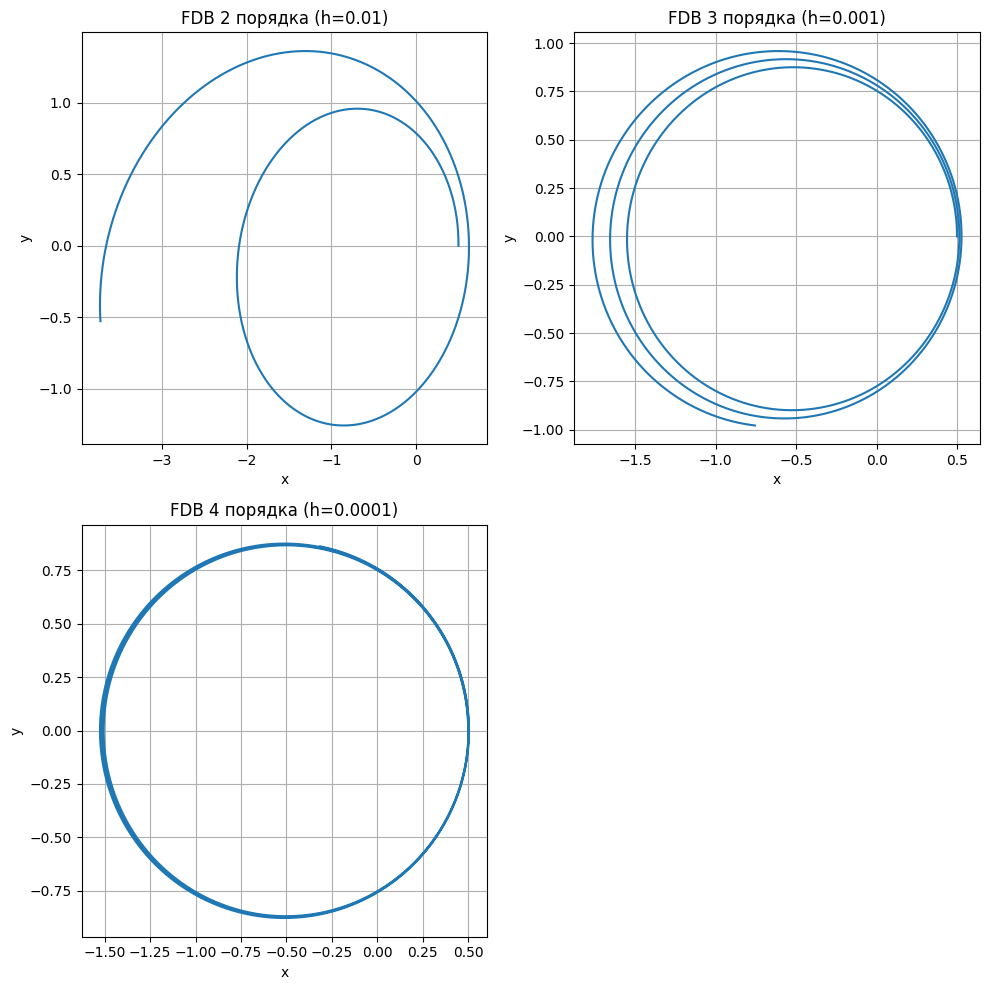

In [46]:
def simulate_fdb(method, dt, order):
    # Разгонный участок РК4
    states = simulate(rk4, dt)[:order]
    while states[-1].t < Params.t_end:
        states.append(method(states, dt))
    return states

plt.figure(figsize=(10, 10))

# FDB 2 порядка
plt.subplot(2, 2, 1)
states = simulate_fdb(FDB_2, 0.01, 2)
x = [s.x for s in states]
y = [s.y for s in states]
plt.plot(x, y)
plt.title("FDB 2 порядка (h=0.01)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# FDB 3 порядка
plt.subplot(2, 2, 2)
states = simulate_fdb(FDB_3, 0.001, 3)
x = [s.x for s in states]
y = [s.y for s in states]
plt.plot(x, y)
plt.title("FDB 3 порядка (h=0.001)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# FDB 4 порядка
plt.subplot(2, 2, 3)
states = simulate_fdb(FDB_4, 0.0001, 4)
x = [s.x for s in states]
y = [s.y for s in states]
plt.plot(x, y)
plt.title("FDB 4 порядка (h=0.0001)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# 4-й график оставляем пустым для симметрии
plt.subplot(2, 2, 4)
plt.axis('off')

plt.tight_layout()
plt.show()